# Transfusions de sang

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

###  Graf amb els seus vertexos
**Important:** el graf és dirigit

In [2]:
G = nx.DiGraph()

# origen i desti del flux
G.add_node('s')
G.add_node('t')

# Donants i receptors
G.add_nodes_from(['dA', 'dB', 'dO', 'dAB'])
G.add_nodes_from(['rA', 'rB', 'rO', 'rAB'])

#### Arestes representant les compatibilitats

In [3]:
G.add_edges_from ([('dA', 'rA'), ('dA', 'rAB')])
G.add_edges_from ([('dB', 'rB'), ('dB', 'rAB')])
G.add_edges_from ([('dO', 'rA'), ('dO', 'rB'), ('dO', 'rO'), ('dO', 'rAB')])
G.add_edge('dAB', 'rAB')

#### Capacitat pels donants

In [4]:
G.add_edge('s', 'dA', capacity=46)
G.add_edge('s', 'dB', capacity=34)
G.add_edge('s', 'dO', capacity=45)
G.add_edge('s', 'dAB', capacity=45)

#### Capacitat pels receptors

In [5]:
G.add_edge('rA', 't', capacity=39)
G.add_edge('rB', 't', capacity=38)
G.add_edge('rO', 't', capacity=42)
G.add_edge('rAB', 't', capacity=50)

#### Un dibuix del graf

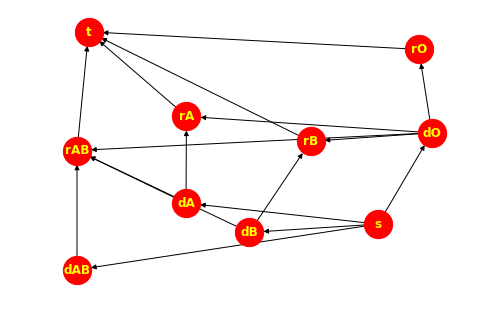

In [6]:
nx.draw(G, node_size=800, with_labels=True, font_color='yellow', font_weight="bold")   

#### Calculem el flux màxim des de `s` a `t`

In [7]:
flowValue, flowEdges = nx.maximum_flow(G, 's', 't')

#### Mirem el valor màxim del flux i el flux per cada aresta. Amb això podem deduir com hem de distribuir les transfusions

In [8]:
print("The max flow is", flowValue)
print(flowEdges)

The max flow is 168
{'s': {'dA': 44, 'dB': 34, 'dO': 45, 'dAB': 45}, 't': {}, 'dA': {'rA': 39, 'rAB': 5}, 'dB': {'rB': 34, 'rAB': 0}, 'dO': {'rA': 0, 'rB': 4, 'rO': 41, 'rAB': 0}, 'dAB': {'rAB': 45}, 'rA': {'t': 39}, 'rB': {'t': 38}, 'rO': {'t': 41}, 'rAB': {'t': 50}}


**Comentari:** Aquesta solució ha decidit que un/a estudiant del grup O es quedi sense transfusió. La solució és diferent que la que hem trobat a classe, tot i que el cost (168) és el mateix.